# AI Predictive Maintenance for Machines

# 기계를 위한 AI 예측 유지보수

## Introduction

인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 실제로 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 Python을 사용할 것입니다.- AI가 항공기의 센서 데이터를 사용하여 유지 관리가 필요한 센서를 예측하는 방법을 연구합니다.

## Context

우리는 [Github](https://github.com/Samimust/predictive-maintenance/tree/master/data)에서 얻은 항공기 센서 데이터를 사용합니다. csv 파일에는 Microsoft에서 제공하는 시뮬레이션된 항공기 엔진 고장 이벤트, 작동 설정 및 21개 센서 측정값이 포함되어 있습니다. 엔진의 성능 저하 패턴이 센서 측정에 반영된다고 가정합니다.

## Use Python to open csv files

[scikit-learn](https://scikit-learn.org/stable/), [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/)를 사용하여 데이터 세트를 작업합니다. Scikit-learn은 예측 데이터 분석을 위한 효율적인 도구를 제공하는 매우 유용한 기계 학습 라이브러리입니다. Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다. Matplotlib은 고품질의 데이터 시각화를 위한 Python의 2차원 그래프 라이브러리입니다. 코드 몇 줄만으로 간단하게 복잡한 그래프를 만들 수 있어서 사용성이 매우 높습니다.

In [2]:
! pip install gradio --quiet

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import gradio as gr
from sklearn import linear_model
from sklearn import metrics

### Data 설명

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
# # Train 데이터 불러오기
# df_train = pd.read_csv(r'drive/MyDrive/Colab Notebooks/Dataset/[Dataset]_Module11_Train_(Maintenance).csv')

In [10]:
# Train 데이터 불러오기
df_train = pd.read_csv(r'Dataset/[Dataset]_Module11_Train_(Maintenance).csv')

데이터 세트에는 시뮬레이션된  시뮬레이션된 항공기 엔진 고장 이벤트, 작동 설정 및 21개 센서 측정값이 포함되어 있습니다. 이제 그 Data를 실제로 보도록 하겠습니다.

## Task1: 첫 10개 행을 출력하여 train 데이터 탐색하기

In [11]:
df_train.head(10)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,0.025727,0.0,1.140175,0.0,0.0,0.051186,0.031436,186,0,0
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,0.023476,0.0,1.140175,0.0,0.0,0.086718,0.021634,185,0,0
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,0.022477,0.0,0.836660,0.0,0.0,0.086487,0.034405,184,0,0
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,0.020740,0.0,0.836660,0.0,0.0,0.077136,0.038939,183,0,0
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,0.020493,0.0,0.836660,0.0,0.0,0.062849,0.058103,182,0,0


In [13]:
df_train.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.0,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,0.018802,0.0,0.885173,0.0,0.0,0.094636,0.056483,107.807862,0.150259,0.227813
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.007103,0.0,0.341989,0.0,0.0,0.034867,0.020669,68.880990,0.357334,0.575358
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,0.013724,0.0,0.547723,0.0,0.0,0.070071,0.041825,51.000000,0.000000,0.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,0.018365,0.0,0.836660,0.0,0.0,0.092736,0.055555,103.000000,0.000000,0.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,0.023380,0.0,1.140175,0.0,0.0,0.117132,0.069839,155.000000,0.000000,0.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,0.065761,0.0,2.828427,0.0,0.0,0.325269,0.187313,361.000000,1.000000,2.000000


In [ ]:
# # test 데이터 불러오기
# df_test = pd.read_csv(r'drive/MyDrive/Colab Notebooks/Dataset/[Dataset]_Module11_Test_(Maintenance).csv')
# df_test.head(10)

In [14]:
# test 데이터 불러오기
df_test = pd.read_csv(r'Dataset/[Dataset]_Module11_Test_(Maintenance).csv')
df_test.head(10)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0
5,6,105,0.0076,-0.0003,100.0,518.67,643.05,1586.94,1404.49,14.62,...,0.007488,0.0,0.447214,0.0,0.0,0.153395,0.071794,93,0,0
6,7,160,0.0016,-0.0001,100.0,518.67,642.10,1589.59,1413.57,14.62,...,0.016718,0.0,0.000000,0.0,0.0,0.098387,0.063694,91,0,0
7,8,166,0.0016,-0.0005,100.0,518.67,642.59,1591.91,1413.89,14.62,...,0.018301,0.0,0.447214,0.0,0.0,0.054314,0.036437,95,0,0
8,9,55,-0.0003,0.0004,100.0,518.67,642.27,1593.61,1410.27,14.62,...,0.013525,0.0,0.836660,0.0,0.0,0.015166,0.047928,111,0,0
9,10,192,-0.0018,0.0004,100.0,518.67,643.00,1589.50,1398.99,14.62,...,0.030489,0.0,0.836660,0.0,0.0,0.087920,0.055861,96,0,0


## Task 2: describe 함수를 사용하여 train과 test data set 에 대한 정보 가져오기

In [16]:
df_train.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.0,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,0.018802,0.0,0.885173,0.0,0.0,0.094636,0.056483,107.807862,0.150259,0.227813
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.007103,0.0,0.341989,0.0,0.0,0.034867,0.020669,68.880990,0.357334,0.575358
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,0.013724,0.0,0.547723,0.0,0.0,0.070071,0.041825,51.000000,0.000000,0.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,0.018365,0.0,0.836660,0.0,0.0,0.092736,0.055555,103.000000,0.000000,0.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,0.023380,0.0,1.140175,0.0,0.0,0.117132,0.069839,155.000000,0.000000,0.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,0.065761,0.0,2.828427,0.0,0.0,0.325269,0.187313,361.000000,1.000000,2.000000


In [17]:
df_test.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
count,100.000000,100.000000,100.000000,100.000000,100.0,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,...,100.000000,100.0,100.000000,100.0,100.0,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,130.960000,-0.000073,0.000022,100.0,5.186700e+02,642.768400,1591.824700,1410.548200,1.462000e+01,...,0.019207,0.0,0.889000,0.0,0.0,0.093899,0.057975,75.52000,0.250000,0.350000
std,29.011492,53.593479,0.002353,0.000306,0.0,1.142596e-12,0.444592,6.646293,8.626344,2.856489e-14,...,0.008033,0.0,0.307613,0.0,0.0,0.035885,0.020325,41.76497,0.435194,0.657129
min,1.000000,31.000000,-0.005900,-0.000500,100.0,5.186700e+02,641.750000,1576.930000,1389.330000,1.462000e+01,...,0.004287,0.0,0.000000,0.0,0.0,0.015166,0.018966,7.00000,0.000000,0.000000
25%,25.750000,88.750000,-0.001650,-0.000300,100.0,5.186700e+02,642.490000,1587.007500,1403.912500,1.462000e+01,...,0.013697,0.0,0.707107,0.0,0.0,0.070107,0.042731,32.75000,0.000000,0.000000
50%,50.500000,133.500000,-0.000250,0.000100,100.0,5.186700e+02,642.775000,1591.365000,1410.300000,1.462000e+01,...,0.018009,0.0,0.836660,0.0,0.0,0.088544,0.055796,86.00000,0.000000,0.000000
75%,75.250000,164.250000,0.001300,0.000300,100.0,5.186700e+02,643.025000,1597.280000,1416.922500,1.462000e+01,...,0.023288,0.0,1.140175,0.0,0.0,0.114105,0.072792,112.25000,0.250000,0.250000
max,100.000000,303.000000,0.007600,0.000500,100.0,5.186700e+02,644.030000,1607.550000,1428.420000,1.462000e+01,...,0.049270,0.0,1.483240,0.0,0.0,0.187216,0.115700,145.00000,1.000000,2.000000


In [18]:
# 누락된 값 확인
df_train.isnull().sum()

id           0
cycle        0
setting1     0
setting2     0
setting3     0
            ..
sd20         0
sd21         0
ttf          0
label_bnc    0
label_mcc    0
Length: 71, dtype: int64

## Data 시각화

데이터를 시각화하면 다양한 feature가 어떻게 분포되어 있는지에 대한 아이디어를 얻을 수 있으므로 분석에 도움이 됩니다.

In [56]:
features = df_train.columns.values.tolist()
print(features)

['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21', 'ttf', 'label_bnc', 'label_mcc']


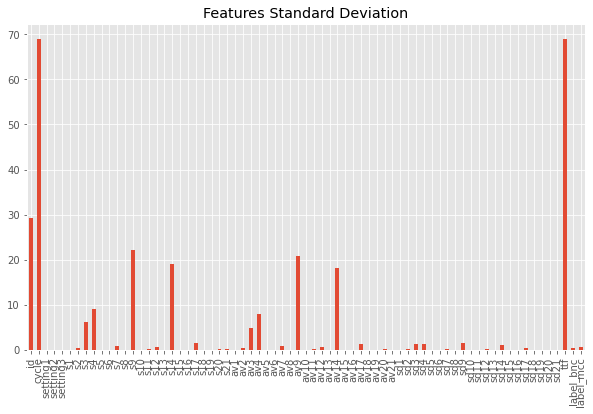

In [57]:
# 입력 feature의 표준 편차를 그려서 비교합니다:
pd.Series(df_train[features].std()).plot(kind='bar', figsize=(10,6), title="Features Standard Deviation")
plt.show()

feature 간의 상관 관계를 확인합니다.

c:\Users\Hongsub\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\Hongsub\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


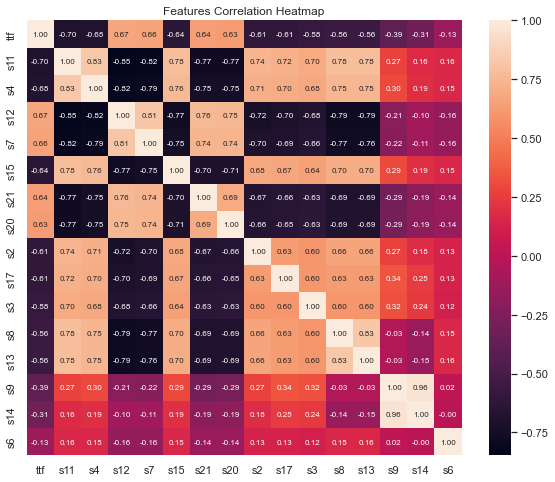

In [66]:
# 더 나은 시각화를 위해 feature의 하위 집합인 feat를 사용하여 상관관계 행렬을 그려봅니다.
feat = list(df_train.columns[2:26])
ttf_idx = features.index('ttf') # 68
feat.append(df_train.columns[ttf_idx])
ttf_idx = feat.index('ttf') # 24

cm = np.abs(np.corrcoef(df_train[feat].values.T))
cm[ttf_idx, [[i for i in range(len(cm[ttf_idx, :])) if pd.isna(cm[ttf_idx, i])]]] = '-inf'
sorted_cm_idx = sorted(range(len(cm[ttf_idx, :])), key=lambda i: cm[ttf_idx, i], reverse=True)

cm_feat = [feat[i] for i in sorted_cm_idx][0:16]
cm = np.corrcoef(df_train[cm_feat].values.T)

sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cm_feat, xticklabels=cm_feat)
plt.title('Features Correlation Heatmap')
plt.show()

## 선형 회귀를 위한 데이터 준비

In [67]:
# 회귀 모델을 위한 데이터를 준비합시다.

# 원본 feature 리스트 입니다.
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# 회귀 레이블과 상관 관계가 낮거나 없는 feature 리스트 입니다.
features_lowcr = [feat[i] for i in sorted_cm_idx][16:]

# 회귀 레이블과 상관 관계가 있는 feature 리스트 입니다.
features_corrl2 = cm_feat[1:]

# features는 실험할 feature 집합을 보유하는 변수이다.
features = features_orig
print(features)

['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


In [68]:
X_train = df_train[features]
y_train = df_train['ttf']

X_test = df_test[features]
y_test = df_test['ttf']

## Helper 함수

In [69]:
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    # reg_metrics 반환
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [70]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    
    """Plot regression coefficients weights or feature importance.
    
    Args:
        model (str): The model name identifier
        weights (array): Contains the regression coefficients weights or feature importance
        feature_names (list): Contains the corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'
        
    Returns:
        plot of either regression coefficients weights or feature importance
        
    
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None

## 선형 회귀 모델

선형 회귀는 종속 변수(출력)와 하나 이상의 독립 변수(입력) 간의 관계를 모델링하는 간단한 모델입니다.

![linear regression](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png)

RMSE

RMSE는 평균 제곱근 오차를 나타냅니다. 기계 학습 모델을 사용하여 예측을 수행할 때 예측이 정확한지 확인해야 합니다. RMSE는 예측 오류를 측정하는 방법입니다. RMSE가 높으면 예측이 나쁘고, 낮으면 예측이 좋은 것입니다.

MAE

MAE는 평균 절대 오차를 나타냅니다. RMSE와 마찬가지로 MAE는 예측의 오류를 측정하는 방법입니다. MAE가 높으면 예측이 나쁘고 그 반대의 경우 좋은 것입니다.

In [72]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

R^2 training: 0.580, R^2 test: 0.405


,Linear Regression
Root Mean Squared Error,32.041095
Mean Absolute Error,25.591780
R^2,0.405495
Explained Variance,0.665297


## Task 3: 선형 회귀로 얻은 feature의 가중치를 그려봅니다.

[ 5.11408412e+01  1.54522207e+03 -3.03089109e-10  7.87736099e-10
 -6.81748786e+00 -4.40992105e-01 -7.64835065e-01 -8.24229573e-12
 -5.10636711e+02  6.88191782e+00 -1.32351313e+01 -3.49539135e-01
 -5.57065505e-12 -3.72126668e+01  1.06238701e+01 -1.18640141e+01
 -2.73807502e-01 -1.19409211e+02 -4.07528096e-23 -1.84817005e+00
  0.00000000e+00  0.00000000e+00  1.98613549e+01  4.10827545e+01]


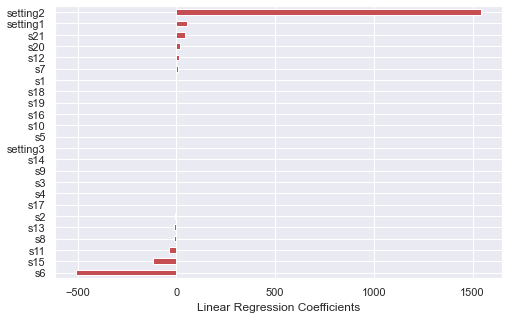

In [77]:
plot_features_weights('Linear Regression', linreg.coef_, X_train.columns, 'c')
print(linreg.coef_)

setting2, setting1, s1, s2 등의 데이터 모델의 매개변수가 그래프에 표시되어 있습니다. setting2와 s6의 빨간색 선이 가장 긴 것을 볼 수 있습니다. 그 feature들이 가장 중요합니다.

In [78]:
def predict(*args):
    data = np.array([args])
    return linreg.predict(data)[0]

In [79]:
number = gr.components.Number
f_name = features
param = {}
for idx, name in enumerate(f_name):
    param['p'+str(idx)] = number(value=X_train[f_name[idx]].mean(), label=f_name[idx])

param_list = [param[i] for i in param]

gr.Interface(predict, 
             param_list, "label",
             allow_flagging='never', live=True).launch(share=True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://26444.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x2ca9b189fd0>,
 'http://127.0.0.1:7860/',
 'https://26444.gradio.app')